# **Exploratory Data Analysis 3**


This notebook will describe exploratory data analysis using multivariate data. Such as date as the index, number of foreign tourist to Indonesia, and Indonesia rate change to USD. The data collected from Jan 1998 to Dec 2016

In [29]:
#load the data into notebook using pandas as usual and import several packages that we usually use it to analyze the data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

In [11]:
#open the data and show a little sample
df = pd.read_csv('kurs.csv')
df.head(10)

,date,tourism,USD
0,Januari 1998,387305,10050
1,Februari 1998,348520,8950
2,Maret 1998,364912,8700
3,Apr-98,380825,8000
4,Mei 1998,312397,11450
5,Juni 1998,320716,14800
6,Juli 1998,394754,13150
7,Agustus 1998,451480,11050
8,Sep-98,411236,10700
9,Oktober 1998,430988,7600


In [12]:
#show the tail
df.tail(20)

,date,tourism,USD
208,Mei 2015,751627,13224
209,Juni 2015,778056,13333
210,Juli 2015,775552,13528
211,Agustus 2015,813185,14050
212,Sep-15,822922,14650
213,Oktober 2015,790162,13688
214,Nov-15,723069,13835
215,Desember 2015,862556,13788
216,Januari 2016,742448,13775
217,Februari 2016,812954,13372


In [13]:
#check the type of data each column
df.dtypes

date       object
tourism     int64
USD         int64
dtype: object

In [14]:
#check the info and description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 3 columns):
date       228 non-null object
tourism    228 non-null int64
USD        228 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.4+ KB


In [15]:
df.describe()

,tourism,USD
count,228.000000,228.000000
mean,539542.324561,9891.596491
std,163484.331709,1665.775036
min,249491.000000,6705.000000
25%,411652.250000,8925.000000
50%,481098.000000,9322.500000
75%,656623.500000,10467.500000
max,985904.000000,14800.000000


We can see from the data above that the type of tourism and USD data is integer. So we can use it as variation and analyze it well. Second, there are 228 record data with non-missing value. So we can conclude that this data (every column) is a clean data and can be proceeded into next round.

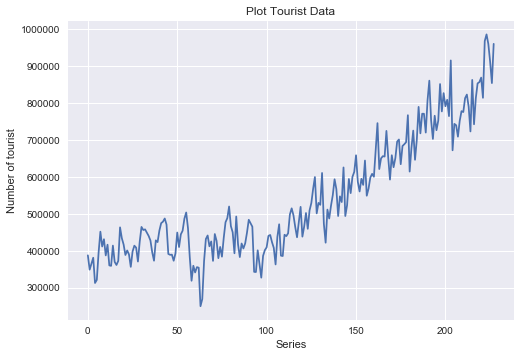

In [16]:
#Plot time series data tourism
plt.plot(df['tourism'])
plt.title('Plot Tourist Data')
plt.xlabel('Series')
plt.ylabel('Number of tourist')
plt.show()

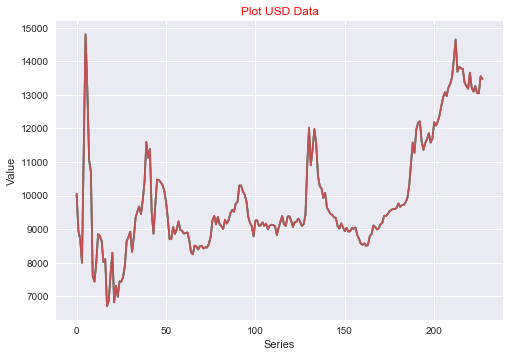

In [23]:
#Plot time series data USD
plt.plot(df['USD'])
plt.title('Plot USD Data', color='red')
plt.xlabel('Series')
plt.ylabel('Value')
plt.show()

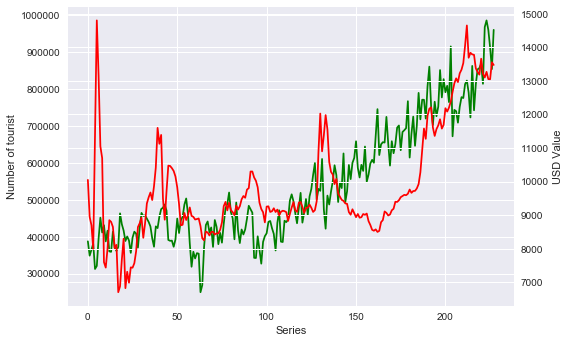

In [27]:
#plot both data into one figure

fig, graph = plt.subplots()
graph.plot(df['tourism'], color='green')
graph.set_xlabel('Series')
graph.set_ylabel('Number of tourist')

graph2 = graph.twinx()
graph2.plot(df['USD'], color='red')
graph2.set_ylabel('USD Value')

plt.show()

### **Plot Scatter and trend line of each data component**

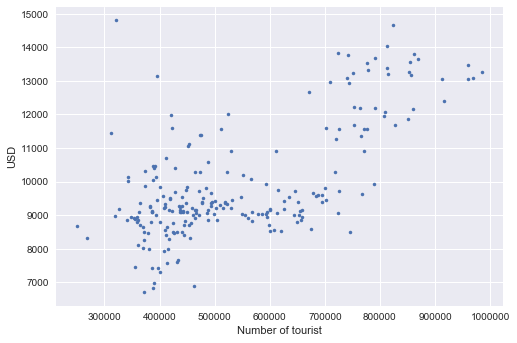

In [28]:
#Scatter between those data

plt.plot(df['tourism'], df['USD'], marker='.', linestyle='none')
plt.xlabel('Number of tourist')
plt.ylabel('USD')
plt.show()

In [31]:
#Find the slope (gradien) correlation
slope, intercept = np.polyfit(df['tourism'], df['USD'], 1)
print('Slope : ', slope)
print('Intercept : ', intercept)

Slope :  0.006701084396994059
Intercept :  6276.07783859175


In [35]:
#define the linear line of data

x = np.array([200000,1000000])
y = slope*x + intercept

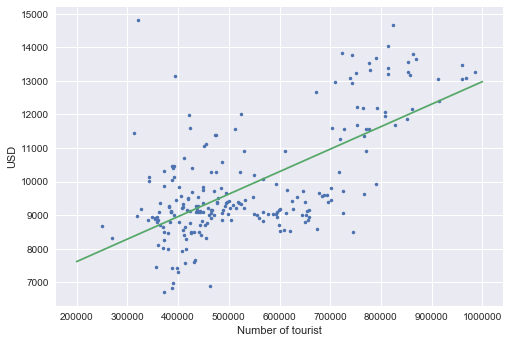

In [36]:
#plot in one figure

plt.plot(df['tourism'], df['USD'], marker='.', linestyle='none')
plt.plot(x,y)
plt.xlabel('Number of tourist')
plt.ylabel('USD')
plt.show()

The graph above tells us that the trend of those data is positive trend. Actually we can breakdown the data into one by one to see the trend line.

### **Check data distribution using histogram and distribution graph**

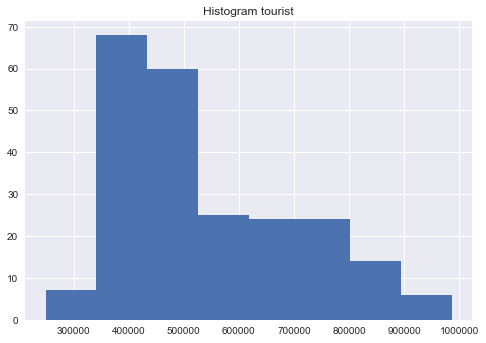

In [48]:
#plot histogram
plt.hist(df['tourism'], bins=8)
plt.title('Histogram tourist')
plt.show()

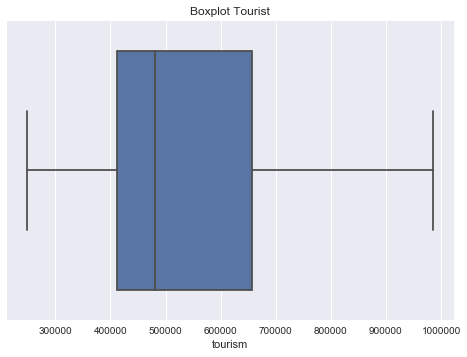

In [53]:
sns.boxplot(x=df['tourism'])
plt.title('Boxplot Tourist')
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


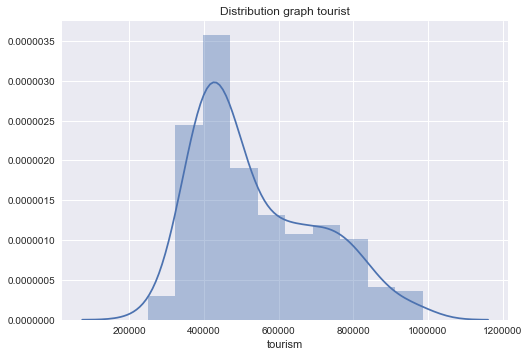

In [55]:
#plotting graph distribution
sns.distplot(df['tourism'], kde=True, rug=False)
plt.title('Distribution graph tourist')
plt.show()

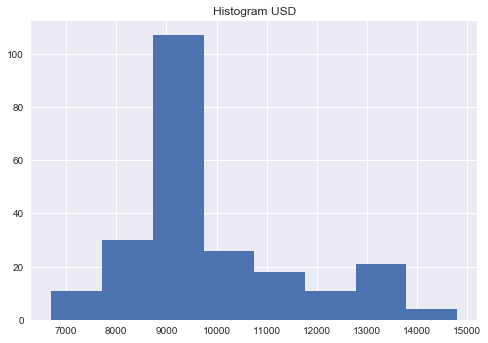

In [56]:
#plot histogram
plt.hist(df['USD'], bins=8)
plt.title('Histogram USD')
plt.show()

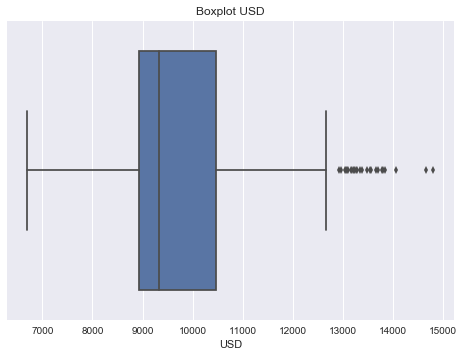

In [57]:
sns.boxplot(x=df['USD'])
plt.title('Boxplot USD')
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


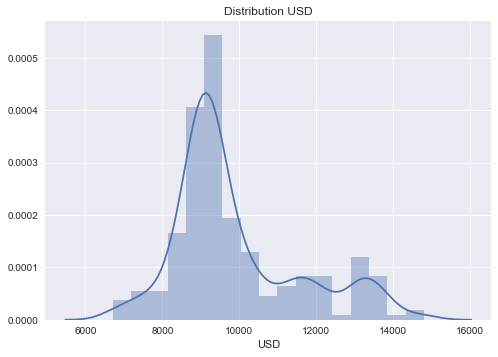

In [58]:
#plotting graph distribution
sns.distplot(df['USD'], kde=True, rug=False)
plt.title('Distribution USD')
plt.show()

From the histogram and graph distribution of those data, we can see both of them having right skewed. From the boxplot, we can see that tourism data has no outlier, BUT in USD has an outlier. We can use boxplot to see the outlier from the mean/median as the center of data.